# Project 1 - Regression of Life Expectancy data

# Data Set


# Life Expectancy data

# Description

Feature Information

The dataset consists of 22 columns and 2938 rows.

Columns

1. Country: Country
2. Year: Year
3. Status: Developed or Developing status
4. Life expectancy: Life Expectancy in age
5. Adult Mortality: Adult Mortality Rates of both sexes 
6. Infant deaths: Number of Infant Deaths per 1000 population
7. Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
8. percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9. Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10. Measles: Measles - number of reported cases per 1000 population
11. BMI: Average Body Mass Index of entire population
12. under-five deaths: Number of under-five deaths per 1000 population
13. Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
14. Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
15. Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16. HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
17. GDP: Gross Domestic Product per capita (in USD)
18. Population: Population of the country
19. thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
20. thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
21. Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. Schooling: Number of years of Schooling(years)

# Data Source

https://www.kaggle.com/kumarajarshi/life-expectancy-who

# Shapes

Dataset contains 2938 rows and 22 columns. Three of those columns are categorical ( ). The rest are continuous

In [1]:
#Import dataset and packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn import preprocessing, linear_model, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 100)

#Part a dataset
dfa = pd.read_csv (r"C:\Users\laksh\LXR190004\applied machine learning\Project 1\Life Expectancy Data.csv")

In [3]:
# Display 5 rows
dfa.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Display information about column and rows
dfa.shape

(2938, 22)

In [5]:
# Display information about the types
dfa.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
# Diplays information about the dataset.
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
dfa.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Romania,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [8]:
#Check columns in the dataset

dfa.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Missing values

In [9]:
dfa.rename(columns={'Life expectancy ':'Life_Expectancy', 'Adult Mortality':'Adult_Mortality','infant deaths':'Infant_Deaths','percentage expenditure':'Percentage_Exp', 'Hepatitis B':'Hepatitis_B', 'Measles ':'Measles', ' BMI ':'BMI',
                          'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_Exp','Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
                          ' thinness  1-19 years':'thinness_1_to_19', ' thinness 5-9 years':'thinness_5_to_9', 'Income composition of resources':'Income_Composition'}, inplace=True)

In [10]:
# Number of Missing Values
print(dfa.isnull().sum())

Country                 0
Year                    0
Status                  0
Life_Expectancy        10
Adult_Mortality        10
Infant_Deaths           0
Alcohol               194
Percentage_Exp          0
Hepatitis_B           553
Measles                 0
BMI                    34
under_five_deaths       0
Polio                  19
Total_Exp             226
Diphtheria             19
HIV/AIDS                0
GDP                   448
Population            652
thinness_1_to_19       34
thinness_5_to_9        34
Income_Composition    167
Schooling             163
dtype: int64


In [11]:
#Percentage of null values
dfa.isna().mean().round(4) * 100

Country                0.00
Year                   0.00
Status                 0.00
Life_Expectancy        0.34
Adult_Mortality        0.34
Infant_Deaths          0.00
Alcohol                6.60
Percentage_Exp         0.00
Hepatitis_B           18.82
Measles                0.00
BMI                    1.16
under_five_deaths      0.00
Polio                  0.65
Total_Exp              7.69
Diphtheria             0.65
HIV/AIDS               0.00
GDP                   15.25
Population            22.19
thinness_1_to_19       1.16
thinness_5_to_9        1.16
Income_Composition     5.68
Schooling              5.55
dtype: float64

In [12]:
#Relaplcing blank cells with the value NaN
dfa.replace(" ", np.NaN, inplace = True)

In [13]:
dfa['Life_Expectancy'] = dfa['Life_Expectancy'].fillna(dfa['Life_Expectancy'].mean())
dfa['Adult_Mortality'] = dfa['Adult_Mortality'].fillna(dfa['Adult_Mortality'].mean())
dfa['Alcohol'] = dfa['Alcohol'].fillna(dfa['Alcohol'].mean())
dfa['Hepatitis_B'] = dfa['Hepatitis_B'].fillna(dfa['Hepatitis_B'].mean())
dfa['BMI'] = dfa['BMI'].fillna(dfa['BMI'].mean())
dfa['Total_Exp'] = dfa['Total_Exp'].fillna(dfa['Total_Exp'].mean())
dfa['Polio'] = dfa['Polio'].fillna(dfa['Polio'].mean())
dfa['Diphtheria'] = dfa['Diphtheria'].fillna(dfa['Diphtheria'].mean())
dfa['GDP'] = dfa['GDP'].fillna(dfa['GDP'].mean())
dfa['Population'] = dfa['Population'].fillna(dfa['Population'].mean())
dfa['thinness_1_to_19'] = dfa['thinness_1_to_19'].fillna(dfa['thinness_1_to_19'].mean())
dfa['thinness_5_to_9'] = dfa['thinness_5_to_9'].fillna(dfa['thinness_5_to_9'].mean())
dfa['Income_Composition'] = dfa['Income_Composition'].fillna(dfa['Income_Composition'].mean())
dfa['Schooling'] = dfa['Schooling'].fillna(dfa['Schooling'].mean())

In [14]:
#Now none of the columns have NaN values
dfa.isna().sum()

Country               0
Year                  0
Status                0
Life_Expectancy       0
Adult_Mortality       0
Infant_Deaths         0
Alcohol               0
Percentage_Exp        0
Hepatitis_B           0
Measles               0
BMI                   0
under_five_deaths     0
Polio                 0
Total_Exp             0
Diphtheria            0
HIV/AIDS              0
GDP                   0
Population            0
thinness_1_to_19      0
thinness_5_to_9       0
Income_Composition    0
Schooling             0
dtype: int64

In [15]:
dfa.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Looking at Turkeys numbers

In [16]:
Turkey =dfa[dfa['Country'] == 'Turkey']
Turkey

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
2681,Turkey,2015,Developing,75.8,16.0,15,4.602861,0.000000,97.0,342,...,97.0,5.93819,97.0,0.1,1979.525690,78271472.0,4.9,4.8,0.764,14.5
2682,Turkey,2014,Developing,75.5,17.0,16,1.450000,181.908378,96.0,565,...,96.0,5.41000,96.0,0.1,12127.225220,773628.0,4.9,4.7,0.759,14.5
2683,Turkey,2013,Developing,75.2,19.0,17,1.410000,188.144035,97.0,7405,...,98.0,5.38000,98.0,0.1,12542.935650,75787333.0,4.9,4.7,0.754,14.4
2684,Turkey,2012,Developing,74.8,112.0,19,1.540000,20.751202,97.0,349,...,97.0,5.24000,97.0,0.1,1172.384300,74569867.0,4.9,4.7,0.750,14.3
2685,Turkey,2011,Developing,74.5,114.0,20,1.530000,1275.877569,96.0,111,...,97.0,5.29000,97.0,0.1,11341.133950,7349455.0,4.9,4.7,0.737,13.8
2686,Turkey,2010,Developing,74.2,116.0,21,1.490000,32.782358,96.0,7,...,97.0,5.61000,97.0,0.1,1672.569300,72326914.0,4.9,4.7,0.715,13.0
2687,Turkey,2009,Developing,73.9,118.0,23,1.400000,106.948290,94.0,4,...,96.0,6.80000,96.0,0.1,936.499911,71339185.0,4.9,4.8,0.709,12.5
2688,Turkey,2008,Developing,73.5,121.0,25,1.390000,22.672718,92.0,0,...,96.0,6.70000,96.0,0.1,185.689750,74432.0,5.0,4.8,0.705,12.5
2689,Turkey,2007,Developing,73.2,124.0,26,1.260000,115.580110,96.0,3,...,96.0,6.40000,96.0,0.1,979.492460,69597281.0,5.0,4.8,0.697,12.3
2690,Turkey,2006,Developing,72.8,126.0,28,1.290000,103.523776,82.0,34,...,9.0,5.81000,9.0,0.1,834.869161,6876345.0,5.0,4.8,0.687,11.9


This plot shows that Turkey's life expectancy was 74 at year 2000, peaked at 78 one year after and hit the bottom with 71 at 2002. Then it increases lineary.

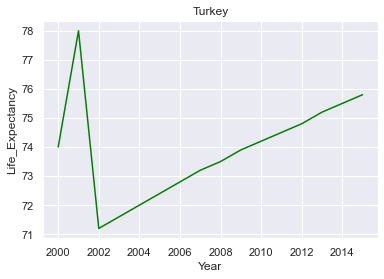

In [17]:
plt.plot(Turkey['Year'], Turkey['Life_Expectancy'], color='green')
plt.xlabel('Year')
plt.ylabel('Life_Expectancy')
plt.title("Turkey")
plt.show()

Staus column is a data type here.

In [18]:
dfa['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status'>

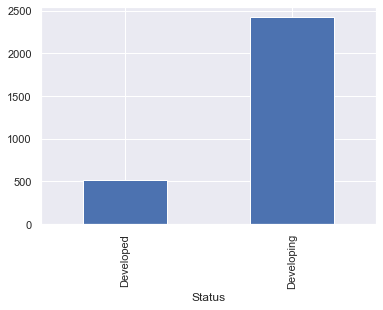

In [19]:
# Counting the developed and developing countries and visualizing it.
# The one which is more given label as 1 and lesser is given label 0

dfa.groupby('Status').count()['Life_Expectancy'].plot(kind = 'bar')

In [20]:
#We can see that the number of Developing countries is more than the Developed ones
#Since the datatype of 'Status' column is object, we convert it to integer values Developing=1 and Developed=0
dfa['Status']=dfa['Status'].map({'Developing':1,'Developed':0}).astype(int)

# DATA ANALYSIS

Importing visualization and plotting libraries

In [21]:
import seaborn as sb
from pandas.plotting import scatter_matrix
%matplotlib inline

array([[<AxesSubplot:xlabel='Adult_Mortality', ylabel='Adult_Mortality'>,
        <AxesSubplot:xlabel='Infant_Deaths', ylabel='Adult_Mortality'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Adult_Mortality'>,
        <AxesSubplot:xlabel='Percentage_Exp', ylabel='Adult_Mortality'>,
        <AxesSubplot:xlabel='Hepatitis_B', ylabel='Adult_Mortality'>],
       [<AxesSubplot:xlabel='Adult_Mortality', ylabel='Infant_Deaths'>,
        <AxesSubplot:xlabel='Infant_Deaths', ylabel='Infant_Deaths'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Infant_Deaths'>,
        <AxesSubplot:xlabel='Percentage_Exp', ylabel='Infant_Deaths'>,
        <AxesSubplot:xlabel='Hepatitis_B', ylabel='Infant_Deaths'>],
       [<AxesSubplot:xlabel='Adult_Mortality', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Infant_Deaths', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Percentage_Exp', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Hepatitis_B', yl

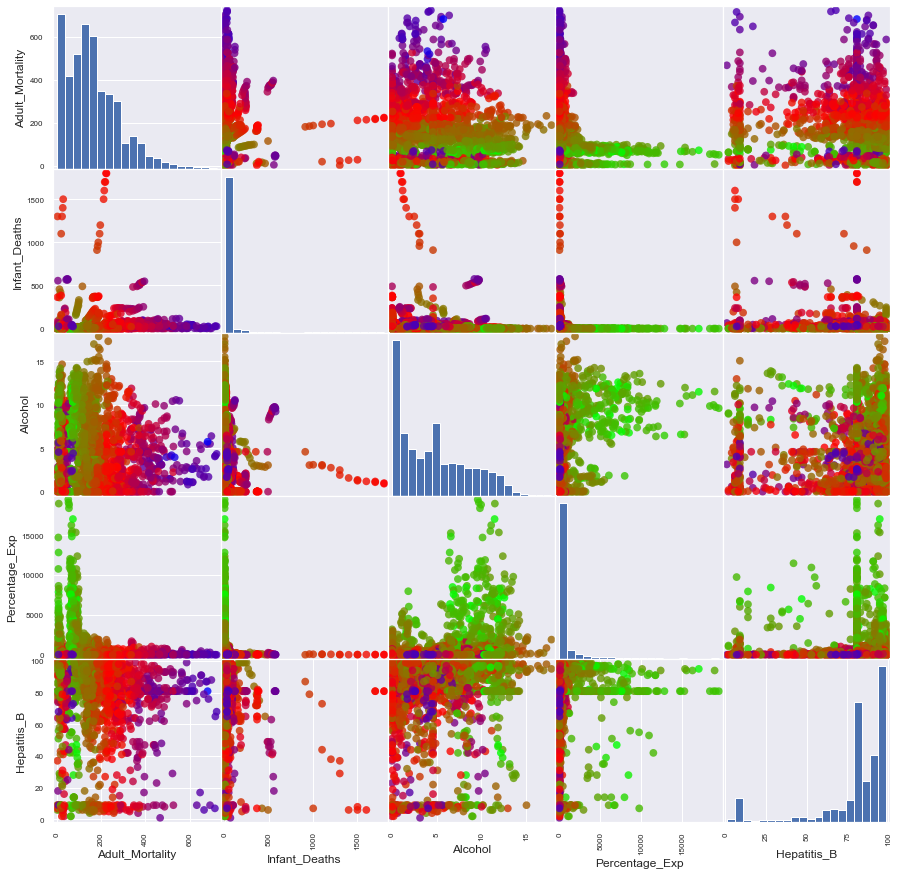

In [22]:
# Visualizing a scatter matrix of a column subset
cols = dfa.columns[4:9]
y = dfa['Life_Expectancy']
scatter_matrix(dfa[cols], figsize =(15,15),c= y, alpha = 0.8, marker='o', hist_kwds={'bins': 20}, s=60, cmap ='brg')                                        

# Some important questions to consider in this dataset

 * Visualize adult and infant mortality rates for top 10 counties with lowest life expectancy
 * What is the impact of schooling on the lifespan of humans?
 * Do densely populated countries tend to have lower life expectancy?

# Visualizing the top 10 countries with lowest life expectancy

In [23]:
low_life = dfa.groupby('Country').mean().nsmallest(10, ['Life_Expectancy']).reset_index()
low_life

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
0,Sierra Leone,2007.5,1,46.11250,357.8125,27.5625,3.245179,29.105579,82.348952,673.8750,...,71.7500,9.013012,72.1250,1.51875,271.505561,3.336265e+06,7.68125,7.10000,0.361812,8.231250
1,Central African Republic,2007.5,1,48.51250,333.0625,16.5000,1.442054,40.905543,64.154009,699.4375,...,41.3125,4.158012,42.4375,8.98125,363.055905,2.016546e+06,7.10625,7.08750,0.335500,6.237500
2,Lesotho,2007.5,1,48.78125,550.0625,4.5000,2.243929,82.118913,74.676336,266.6875,...,67.9375,7.503012,79.4375,22.96875,794.523010,1.200528e+06,7.18750,7.06875,0.456813,10.656250
3,Angola,2007.5,1,49.01875,328.5625,83.7500,5.669554,102.100268,74.911452,3561.3125,...,46.1250,4.045512,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.043750
4,Malawi,2007.5,1,49.89375,424.4375,37.1250,1.149554,25.849706,88.492558,7559.4375,...,89.0625,6.613637,83.6250,16.68125,237.504042,6.700263e+06,7.11875,6.98750,0.410625,10.231250
5,Chad,2007.5,1,50.38750,227.7500,44.8750,0.673304,32.277320,55.407731,4687.7500,...,32.8750,4.476762,26.8125,4.33750,484.791694,4.114092e+06,7.14375,7.04375,0.316625,6.087500
6,Côte d'Ivoire,2007.5,1,50.38750,417.3125,61.5000,2.947679,0.000000,64.996279,1708.2500,...,65.9375,5.736762,68.9375,4.68750,7483.158469,1.275338e+07,6.73750,6.69375,0.627551,11.992793
7,Zimbabwe,2007.5,1,50.48750,462.3750,26.5625,4.489554,20.364271,70.562500,923.0000,...,75.6250,6.144887,75.1875,23.26250,410.980194,8.021343e+06,7.01250,6.98750,0.439125,9.825000
8,Swaziland,2007.5,1,51.32500,339.0000,2.6250,4.472054,278.099713,76.000000,49.1250,...,89.0000,7.223012,83.7500,32.94375,2165.090838,4.573031e+05,6.47500,6.63125,0.515688,10.350000
9,Nigeria,2007.5,1,51.35625,248.5000,535.6875,8.393929,85.444275,54.793894,51653.9375,...,41.3125,3.849887,39.3125,4.83125,1360.139877,7.087700e+07,10.41875,10.36875,0.367375,9.000000


# Visualize adult and infant mortality rates for top 10 counties with lowest life expectancy

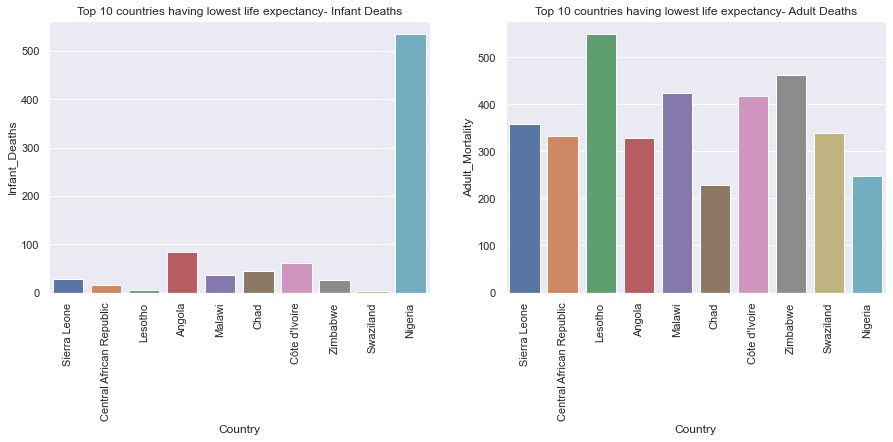

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
infant = sb.barplot(data = low_life, x = low_life.Country, y = low_life['Infant_Deaths'])
infant.set_title("Top 10 countries having lowest life expectancy- Infant Deaths")
infant.set_xticklabels(infant.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
adult = sb.barplot(data = low_life, x = low_life.Country, y = low_life['Adult_Mortality'])
adult.set_title("Top 10 countries having lowest life expectancy- Adult Deaths")
adult.set_xticklabels(adult.get_xticklabels(), rotation = 90)


plt.show()

We can see that among the top 10 countries with the lowest mean life expectancy, the adult mortality is highest in Lesotho and infant mortality is highest in Nigeria. Althought the average life expectancy is low for these countries, it's nice to see that the average infant deaths for countries other than Nigeria is pretty low.

# What is the impact of schooling on the lifespan of humans?

In [25]:
#Top 10 Countries with lowest schooling and their lifespan

low_school = dfa.groupby('Country').mean().nsmallest(10, ['Schooling']).reset_index()
low_school

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
0,Marshall Islands,2013.0,1,69.224932,164.796448,0.0000,0.010000,871.878317,8.000000,0.0000,...,79.000000,17.240000,79.000000,0.10000,3617.752354,1.275338e+07,0.100000,0.100000,0.627551,0.00000
1,Tuvalu,2013.0,1,69.224932,164.796448,0.0000,0.010000,78.281203,9.000000,0.0000,...,9.000000,16.610000,9.000000,0.10000,3542.135890,1.819000e+03,0.200000,0.100000,0.627551,0.00000
2,South Sudan,2007.5,1,53.875000,346.312500,27.7500,4.602861,8.241077,77.819182,315.7500,...,70.503255,5.332904,71.285307,3.69375,4287.696050,3.750827e+06,4.839704,4.870317,0.131687,1.53125
3,Niger,2007.5,1,56.981250,232.437500,52.8125,0.373304,19.099369,72.029009,15467.1250,...,52.937500,6.537387,52.312500,1.16250,259.782441,1.124072e+07,9.025000,8.912500,0.298125,4.01875
4,Djibouti,2007.5,1,60.756250,274.687500,1.4375,1.003929,98.838448,79.286452,113.8750,...,74.875000,6.999887,75.125000,3.28125,897.999871,6.341162e+05,5.843750,5.700000,0.418437,4.75000
5,Eritrea,2007.5,1,60.687500,308.625000,6.3125,0.857679,6.436069,85.742558,175.0000,...,87.812500,3.623012,82.250000,1.21250,2065.336135,4.742283e+06,8.081250,8.018750,0.255312,4.92500
6,Burkina Faso,2007.5,1,55.643750,252.500000,44.7500,4.263929,52.045581,81.040173,5091.7500,...,69.000000,6.031762,77.312500,1.83750,410.372034,6.143695e+06,7.418750,6.981250,0.229688,5.40625
7,Chad,2007.5,1,50.387500,227.750000,44.8750,0.673304,32.277320,55.407731,4687.7500,...,32.875000,4.476762,26.812500,4.33750,484.791694,4.114092e+06,7.143750,7.043750,0.316625,6.08750
8,Central African Republic,2007.5,1,48.512500,333.062500,16.5000,1.442054,40.905543,64.154009,699.4375,...,41.312500,4.158012,42.437500,8.98125,363.055905,2.016546e+06,7.106250,7.087500,0.335500,6.23750
9,Sudan,2007.5,1,61.825000,240.312500,64.6250,1.654554,97.698443,75.043894,3108.0000,...,72.250000,5.710512,72.375000,0.25000,1192.797953,1.804652e+07,4.839704,4.870317,0.441000,6.37500


In [26]:
# Top 10 Countries with highest schooling and their lifespan

high_school = dfa.groupby('Country').mean().nlargest(10, ['Schooling']).reset_index()
high_school

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
0,Australia,2007.5,0,81.81250,63.1875,1.00,9.808304,5332.226473,92.621279,103.9375,...,86.7500,8.655512,86.8750,0.1,34637.565047,4.587010e+06,0.66875,0.62500,0.918125,20.03750
1,New Zealand,2007.5,0,81.33750,71.5000,0.00,9.166250,2922.147780,70.187500,94.9375,...,89.1250,8.692387,70.6250,0.1,14775.554807,1.275338e+07,0.31250,0.30000,0.891188,18.86875
2,Iceland,2007.5,0,82.44375,49.3750,0.00,7.287054,4991.595308,80.940461,0.0000,...,89.7500,8.383012,89.7500,0.1,30159.502907,1.861776e+05,0.95625,0.90000,0.885312,18.15625
3,Ireland,2007.5,0,80.15000,72.4375,0.00,12.150804,4867.312605,83.150288,174.5000,...,86.1250,7.616762,86.1250,0.1,33835.272005,3.599795e+06,0.30000,0.21875,0.891500,17.65625
4,Norway,2007.5,0,81.79375,66.2500,0.00,6.234375,4658.813918,80.940461,6.3125,...,93.0625,8.889262,87.9375,0.1,27434.946928,2.614432e+06,0.76250,0.70000,0.931437,17.46875
5,Finland,2007.5,1,80.71250,68.8750,0.00,9.243304,2889.315470,80.940461,2.8125,...,97.1875,8.446762,98.2500,0.1,25268.649758,3.493082e+06,0.90000,0.80625,0.872937,17.29375
6,Denmark,2007.5,0,79.25625,66.0625,0.00,10.326429,5313.335794,80.940461,15.7500,...,88.0000,7.704887,88.0000,0.1,33067.407916,4.260081e+06,1.16250,0.93750,0.899875,17.19375
7,Netherlands,2007.5,0,81.13125,61.6250,1.00,8.581429,3805.687048,70.709067,251.9375,...,96.8125,7.066137,96.8125,0.1,34964.719797,9.775704e+06,1.02500,0.96250,0.899750,17.05625
8,Belgium,2007.5,0,80.68125,70.1875,0.25,10.640179,2392.432657,74.500000,81.5625,...,97.7500,5.960512,97.3125,0.1,16915.306000,2.884043e+06,0.86250,0.85625,0.877750,16.78750
9,Germany,2007.5,0,81.17500,71.2500,2.50,11.189554,3900.890261,77.437500,1497.1875,...,94.8125,4.189887,89.8750,0.1,24337.749100,3.875735e+07,1.11875,1.10625,0.894500,16.60000


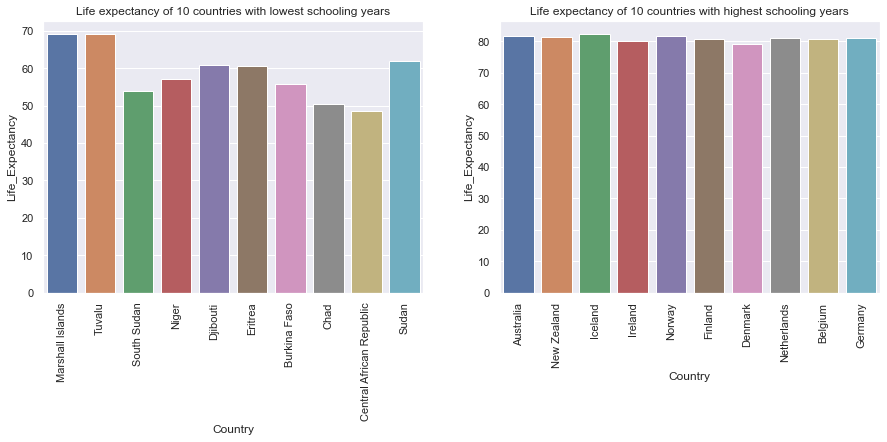

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
school_low = sb.barplot(data = low_school, x = low_school.Country, y = low_school['Life_Expectancy'])
school_low.set_title("Life expectancy of 10 countries with lowest schooling years")
school_low.set_xticklabels(school_low.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
school_high = sb.barplot(data = high_school, x = high_school.Country, y = high_school['Life_Expectancy'])
school_high.set_title("Life expectancy of 10 countries with highest schooling years")
school_high.set_xticklabels(school_high.get_xticklabels(), rotation = 90)


plt.show()

In [28]:
print(low_school['Life_Expectancy'].mean()) #Avg life expectancy for low schooling years countries
print(high_school['Life_Expectancy'].mean()) #Avg life expectancy for high schooling years countries

58.71186133879784
81.049375


From the bar plots above and by taking the mean, we can infer that the average Life Expectancy is more for the countries that have many years of schooling as compared to those that have very few schooling years

# Do densely populated countries tend to have lower life expectancy?

In [29]:
#Top 10 Countries with lowest and highest populations

low_pop = dfa.groupby('Country').mean().nsmallest(10, ['Population']).reset_index()
high_pop = dfa.groupby('Country').mean().nlargest(10, ['Population']).reset_index()

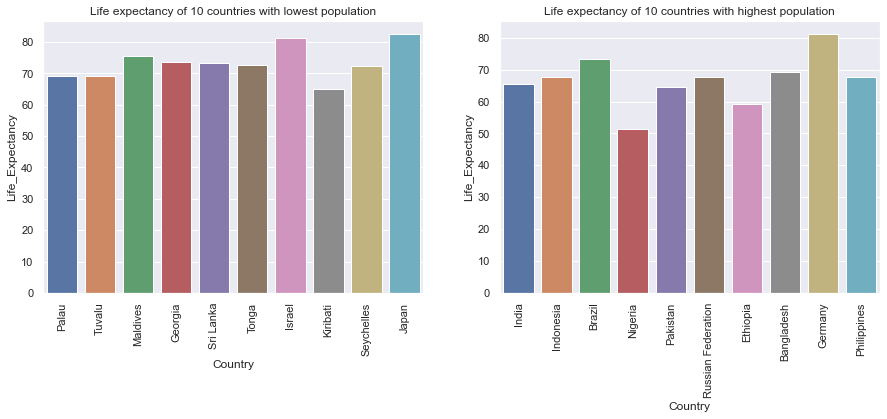

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
pop_low = sb.barplot(data = low_pop, x = low_pop.Country, y = low_pop['Life_Expectancy'])
pop_low.set_title("Life expectancy of 10 countries with lowest population")
pop_low.set_xticklabels(pop_low.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
pop_high = sb.barplot(data = high_pop, x = high_pop.Country, y = high_pop['Life_Expectancy'])
pop_high.set_title("Life expectancy of 10 countries with highest population")
pop_high.set_xticklabels(pop_high.get_xticklabels(), rotation = 90)


plt.show()

Except for Nigeria, the graphs don't show much of a difference in the life expectancy for countries which have the lowest and highest populations. Nigeria has quite a low life expectancy of 50. Let's see the actual averages

In [31]:
print(low_pop['Life_Expectancy'].mean()) #Avg life expectancy for 10  low population countries
print(high_pop['Life_Expectancy'].mean()) #Avg life expectancy for 10  high populationcountries

#Again, not much difference there

73.47873633879782
66.71374999999998


# Dropping unwanted columns 

We drop the column 'Country' as it will no longer be needed for running the models. There are too many country names, hence high cardinality and we cannot create one hot vector for this column

In [32]:
dfa.drop('Country', axis = 1, inplace = True)

# Correlation Matrix

Correlation map of the features. 1 means positively correlated, -1 means negatively correlated. Infant deaths and Under-Five deaths are positively correlated so we need to drop one of them. GDP and percentage expenditure are highly correlated too. Also thinness 1-19 years and thinness 5-9 are highly correlated. I would like to drop one of the features, if their correlation is bigger than 0.75 or less than -0.75. So I will drop Infant deaths (because under-five also includes it), percentage expenditure (I think GDP has more important informations) and thinness 5-9 years (because thinness 1-19 also includes it) as well as Income composition of resources which has 0.78 correlation with Schooling.

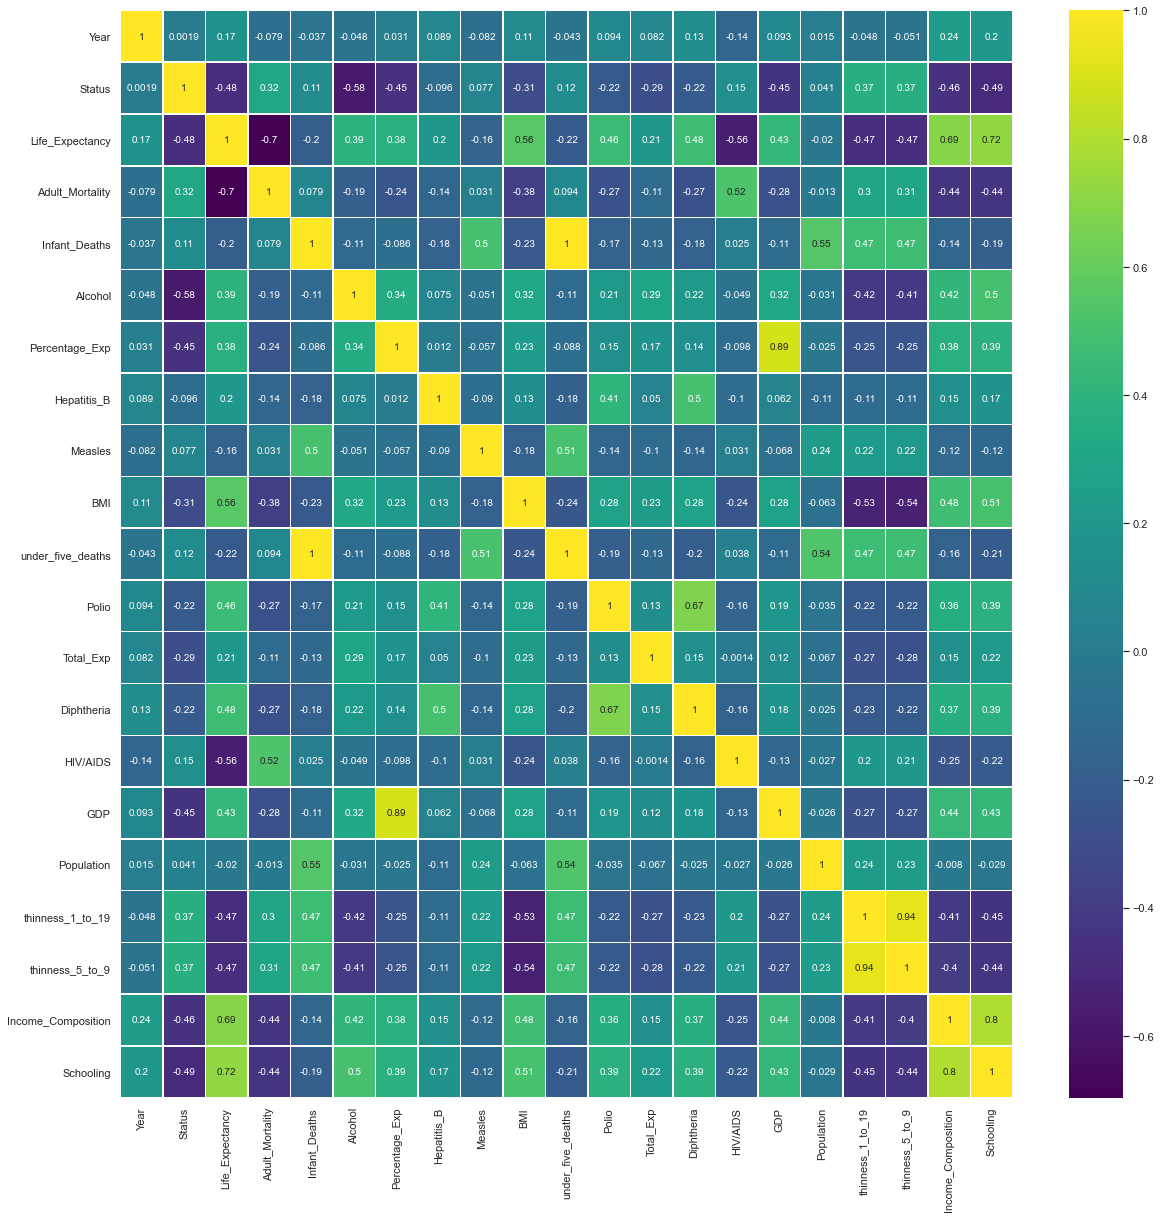

In [33]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(dfa.corr(), linewidths = 0.5 , cmap='viridis', annot=True)
plt.show()

The following features are highly correlated:

1. Under 5 deaths <---> Infant Deaths. Hence we will remove the feature under 5 deaths
2. Thinness 5-9 <---> Thinness 1-19. Hence we will remove the heature Thinness 5-9

In [34]:
dfa.drop(columns=['under_five_deaths','thinness_5_to_9'],axis =1, inplace=True)

# REGRESSION TASK

• Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best hyper-parameter. Use plots and graphs to help you get a better glimpse of the results

• Then use cross-validation to find average training and testing score.

• Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear), Decison Tree Regressor

• Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set

In [35]:
#Life_Expectancy is the target feature y. X is the featureset.
X = dfa.drop(['Life_Expectancy'],axis =1)
y = dfa['Life_Expectancy']

Split the data into Train and Test set. Default for test is 0.25. We have set it to 0.3 to explore this parameter

In [36]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Scaling the dataset

We are using the MinMax Scaler for our dataset to bring all values within the range 0-1. The dataset is not sparse and has a good amount of continuous columns. However, some columns have values in thousands, some in hundreds and some 0 and 1. The featureset is comprised of different scales of continuous valued colums. As explained for the Boston Housing data which has a similar structre, we have used MinMax scaler

In [37]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [38]:
#You can see now that the X_train and X_test (split featureset) have been scaled in the range of 0-1
pd.DataFrame(X_train)
#Similarly you can see for X_test. We have commented it here. Can uncomment and run to see the range 0-1 in test data
#pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.266667,1.0,0.308864,0.004444,0.000000,0.000257,0.813819,0.023748,0.261877,0.677083,0.256669,0.051546,0.023762,0.000526,0.000291,0.032609,0.475738,0.323671
1,0.866667,1.0,0.264543,0.000000,0.000000,0.010301,0.979381,0.000000,0.327926,0.979167,0.556609,0.979381,0.001980,0.013976,0.000016,0.202899,0.589662,0.531401
2,0.933333,1.0,0.009695,0.000000,0.265018,0.022010,0.989691,0.000000,0.651217,0.989583,0.326615,0.989691,0.000000,0.039514,0.000245,0.039855,0.802743,0.685990
3,0.333333,1.0,0.527701,0.051111,0.296231,0.005041,0.813819,0.001216,0.193511,0.375000,0.221103,0.371134,0.049505,0.012460,0.016574,0.032609,0.449367,0.328502
4,0.466667,1.0,0.131579,0.158333,0.227915,0.016051,0.927835,0.513816,0.286211,0.947917,0.234143,0.938144,0.000000,0.023270,0.001117,0.166667,0.695148,0.550725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,0.333333,1.0,0.439058,0.001111,0.071849,0.000652,0.813819,0.001404,0.025492,0.708333,0.405453,0.711340,0.075248,0.000804,0.000664,0.210145,0.417722,0.193237
2052,0.933333,1.0,0.042936,0.001667,0.000000,0.000688,0.000000,0.000061,0.266512,0.218750,0.203320,0.000000,0.085149,0.001649,0.000957,0.304348,0.613924,0.444444
2053,0.866667,1.0,0.037396,0.004444,0.000000,0.000456,0.061856,0.000292,0.329085,0.052083,0.193242,0.061856,0.019802,0.001243,0.000334,0.289855,0.528481,0.396135
2054,0.600000,1.0,0.227147,0.001111,0.004711,0.001858,0.721649,0.000047,0.163384,0.781250,0.049200,0.721649,0.000000,0.006528,0.000016,0.416667,0.631857,0.584541


We can see here that 70% of the data (total 2938) is X_train (2056) and the reamining 30% is X_test(882)

In [39]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape:  (2056, 18)
y_train shape:  (2056,)
X_test shape:  (882, 18)
y_test shape (882,)


# MODELS and MODEL EVALUTATION

# 1. KNN Regressor

KNN regressor is used to find the number of neighbours which with help us determine the y_predicted (predicted life expectancy) value for an instance in the dataset. The chosen n should maximize the train and test scores, have a small difference bwteen them, have a good R2 score and minimize the MSE.

Text(0, 0.5, 'Accuracy')

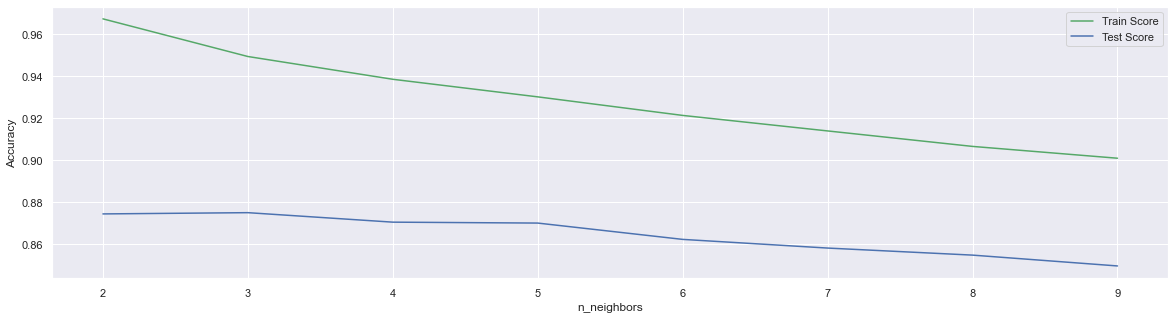

In [40]:
#Visualization of the best value for k n_neighbours
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(2,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(2,10)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

In [41]:
train_score_np = np.array(train_score_array)
test_score_np = np.array(test_score_array)
print('Train score',train_score_array)
print('Test score',test_score_array)
difference = train_score_np - test_score_np
print('Difference',difference)

Train score [0.9671486549118139, 0.9492433373249771, 0.938412688364972, 0.9300529021592994, 0.9212291528255474, 0.9138503433739875, 0.9064891939362392, 0.9008713748281303]
Test score [0.8743866090469152, 0.8749810924766742, 0.8704674028367723, 0.8700329724051183, 0.8622740610716887, 0.8581484902539374, 0.8547922289549661, 0.8496437911861862]
Difference [0.09276205 0.07426224 0.06794529 0.06001993 0.05895509 0.05570185
 0.05169696 0.05122758]


We can see that the train and test score is relatively high when the n_neighbours is 3. Also considering that the difference between the train and test score is lower compared to other values of k.

# Selecting number of neighbours=3 randomly

In [42]:
knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_train, y_train)
y_predicted = knn_reg.predict(X_test)

print("train score: {:.4f}".format(knn_reg.score(X_train, y_train)))
print("test score: {:.4f}".format(knn_reg.score(X_test, y_test)))
print('difference: {:.4f}'.format((knn_reg.score(X_train, y_train)) - (knn_reg.score(X_test, y_test))))

train score: 0.9492
test score: 0.8750
difference: 0.0743


We can also use the GridSearchCV to find the best hyperparameters(in KNN case k or number of nearest neighbours) for the model

# Using Grid Search

In [43]:
param_grid_knn = {'n_neighbors':range(2,10), 'weights':['distance','uniform'],'p': [1,2]}
print("Parameter grid:\n{}".format(param_grid_knn))

from sklearn.model_selection import GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_reg, param_grid=param_grid_knn, return_train_score=True, cv=7)
grid_search_knn.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_knn.best_params_))

Parameter grid:
{'n_neighbors': range(2, 10), 'weights': ['distance', 'uniform'], 'p': [1, 2]}
Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


Using the Grid Search CV, we have got best parameters as k=3 and weights=distance. For regression, the cost function is the MSE and the metric to check the best fit of the model is R2 score

In [44]:
from sklearn import metrics
#from sklearn.metrics import mean_squared_error
knn_reg_best = KNeighborsRegressor(n_neighbors =3 , weights = 'distance', p=1)
knn_reg_best.fit(X_train, y_train)
y_predicted = knn_reg_best.predict(X_test)

print('Train score: {:.4f}'.format(knn_reg_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn_reg_best.score(X_test, y_test)))
print("R2_score: {:.4f} ".format(metrics.r2_score(y_test,y_predicted)))
MSE = np.square(np.subtract(y_test,y_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

#There seems to be some data leakage as the train score is a perfect 1. Hence, although this has high scores and low MSE, we won't consider this as the best model

Train score: 1.0000
Test score: 0.9316
R2_score: 0.9316 
MSE: 6.1002


# Checking Cross Validation scores

In [45]:
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

# convert to DataFrame
results = pd.DataFrame(grid_search_knn.cv_results_)
# show the first 5 rows
display(results.tail())

Best cross-validation score: 0.93


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
27,0.001107,0.001501,0.014269,0.003849,8,2,uniform,"{'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}",0.872715,0.868273,...,31,0.902737,0.899601,0.899721,0.899838,0.902603,0.897383,0.904124,0.900858,0.002179
28,0.001423,0.001668,0.014521,0.002684,9,1,distance,"{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}",0.907952,0.925805,...,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
29,0.000000,0.000000,0.013044,0.002100,9,1,uniform,"{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}",0.898613,0.913487,...,16,0.935070,0.931020,0.929772,0.931881,0.933271,0.928391,0.932243,0.931664,0.002045
30,0.000000,0.000000,0.011775,0.001021,9,2,distance,"{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}",0.885329,0.880942,...,26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
31,0.000699,0.001348,0.012335,0.001498,9,2,uniform,"{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}",0.872844,0.866089,...,32,0.896960,0.894686,0.894174,0.894767,0.897448,0.892484,0.899298,0.895688,0.002143


# Finding the average Training and Testing Score using Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

train_cvscore = cross_val_score(knn_reg_best, X_train, y_train, cv=7)
print(train_cvscore)

#Average Cross Validation Score for Train Set
print("The average cross validated train score is: {:.4f}".format(train_cvscore.mean()))

[0.91286546 0.93590112 0.94012785 0.92509316 0.92133357 0.94633642
 0.92864356]
The average cross validated train score is: 0.9300


In [47]:
test_cvscore = cross_val_score(knn_reg, X_test, y_test, cv=7)
print(test_cvscore)

#Average Cross Validation Score for Train Set
print("The average cross validated test score is: {:.4f}".format(test_cvscore.mean()))

[0.80714037 0.83417859 0.81445312 0.81952479 0.83776651 0.84128639
 0.81044886]
The average cross validated test score is: 0.8235


In [48]:
np.where(X.columns == 'Adult_Mortality')

(array([2], dtype=int64),)

# Using the best fit KNN regressor that we got above k=3, we were able to minimize the MSE and get a high R2 score of 0.93. Let's fit this chosen KNN regressor to the Adult Mortality Feature

Text(0.5, 0, 'ADULT MORTALITY')

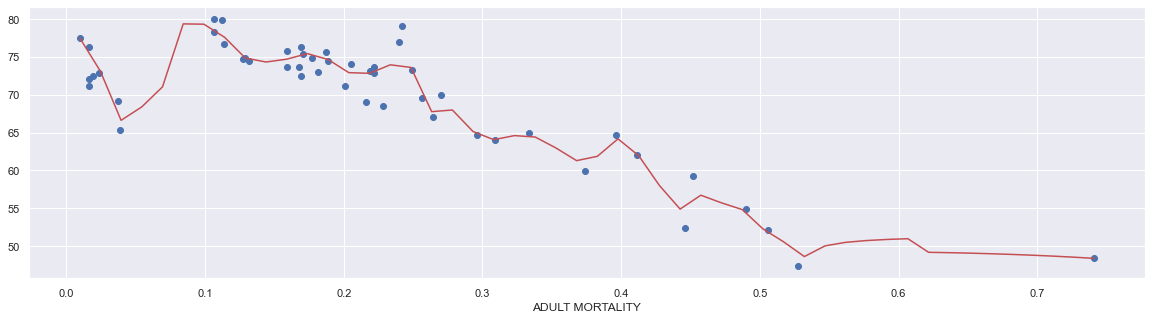

In [49]:
X_b = X_train[:50,2].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(n_neighbors =3 , weights = 'distance', p=1)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

We can see that our chosen KNN Regressor fits this feature well. We can also see that there is one point within the sample which pulls the regressor towards 0.8. If this point were to be removed, we would hace the regressor fitting and ending at the point between 0.5 and 0.6

# 2. LINEAR REGRESSION

In [50]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Test Score:{:.4f}'.format(lreg.score(X_test, y_test)))

Train Score: 0.8099
Test Score:0.8084


We have found the train and test scores for the linear regression model. Let's also find the R2 score and MSE when you use the LReg model on the dataset

In [51]:
from sklearn import metrics

ylinear_predicted = lreg.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test,ylinear_predicted))
print('R2_score: {:.4f}'.format(metrics.r2_score(y_test,ylinear_predicted)))

MSE: 17.094098668975743
R2_score: 0.8084


In [52]:
np.where(X.columns == 'Schooling')

(array([17], dtype=int64),)

We're plotting the number of schooling years across the life expectancy. There is clearly a linear upward trend i.e more the number of years of schooling, higher will be the average life expectancy. We have fit a linear model represented by the red line

Text(0, 0.5, 'Life Expectancy')

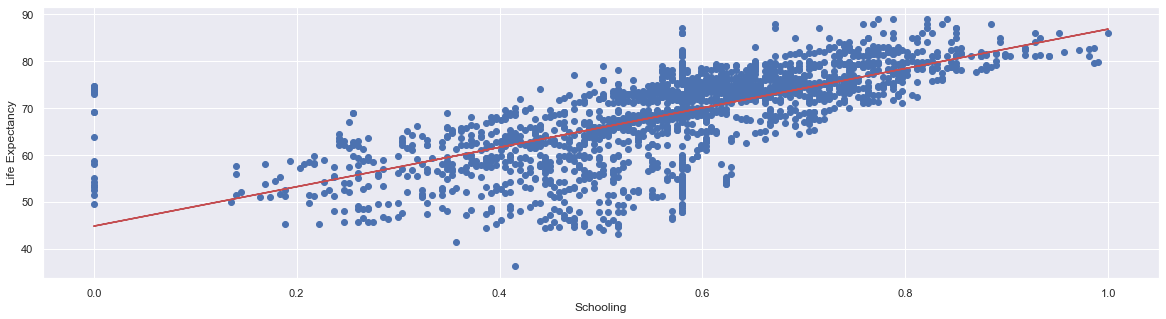

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_school = X_train[:,17].reshape(-1,1)
lreg.fit(X_train_school, y_train)
y_predict_lifexp = lreg.predict(X_train_school)

plt.subplots(figsize = (20,5))
plt.plot(X_train_school, y_predict_lifexp, c = 'r')
plt.scatter(X_train_school,y_train)
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')

# Using Grid Search to find the best hyperparameters

In [54]:
#To find the hyperparameter list of a model
lreg = LinearRegression()
lreg_params = lreg.get_params()
print(f'Default Linear Reg hyperparameters: {lreg_params}')

Default Linear Reg hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [55]:
param_grid_lin = {'copy_X': [True,False], 'fit_intercept': [True,False], 'normalize': [True,False]}
print("Parameter grid:\n{}".format(param_grid_lin))

from sklearn.model_selection import GridSearchCV
grid_search_lin = GridSearchCV(estimator=lreg, param_grid=param_grid_lin, return_train_score=True, n_jobs=None, cv=7)
grid_search_lin.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_lin.best_params_))

Parameter grid:
{'copy_X': [True, False], 'fit_intercept': [True, False], 'normalize': [True, False]}
Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


The above are the best parameters for the Simple Linear Regression Model. Let's apply these hyperparameters to the training and test datasets to find the R2 score, MSE

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lreg_best = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lreg_best.fit(X_train, y_train)
ylin_predicted = lreg_best.predict(X_test)

print('Train score: {:.4f}'.format(lreg_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lreg_best.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,ylin_predicted)))
MSE = np.square(np.subtract(y_test,ylin_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.8099
Test score: 0.8084
R2_score: 0.8084
MSE: 17.0941


We can see that there is not much change in the scores and errors using default parameters and with using best parameters

# Checking Cross Validation scores

In [57]:
print("Best cross-validation score: {:.2f}".format(grid_search_lin.best_score_))

# convert to DataFrame
results = pd.DataFrame(grid_search_lin.cv_results_)
# show the first 5 rows
display(results.head())

Best cross-validation score: 0.81


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_X,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.001572,0.000493,0.000571,0.000495,True,True,True,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.810885,0.822739,...,1,0.809153,0.807022,0.804981,0.819074,0.813669,0.809445,0.808216,0.810223,0.004371
1,0.001143,0.000350,0.000571,0.000495,True,True,False,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.810885,0.822739,...,1,0.809153,0.807022,0.804981,0.819074,0.813669,0.809445,0.808216,0.810223,0.004371
2,0.001152,0.000347,0.000788,0.000524,True,False,True,"{'copy_X': True, 'fit_intercept': False, 'norm...",0.395264,0.336816,...,5,0.330040,0.339701,0.344397,0.355576,0.342125,0.345293,0.332679,0.341401,0.007870
3,0.002452,0.000950,0.000437,0.000489,True,False,False,"{'copy_X': True, 'fit_intercept': False, 'norm...",0.395264,0.336816,...,5,0.330040,0.339701,0.344397,0.355576,0.342125,0.345293,0.332679,0.341401,0.007870
4,0.001427,0.000492,0.000233,0.000382,False,True,True,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.810885,0.822739,...,1,-1.687129,-1.841546,-1.714949,-1.924881,-1.728854,-1.938344,-1.559592,-1.770757,0.127226


Finding the average Training and Testing Score using Cross Validation

In [58]:
train_cvscore_lin = cross_val_score(grid_search_lin, X_train, y_train, cv=7)
print(train_cvscore_lin)

#Average Cross Validation Score for Train Set
print("The average cross validated train score is: {:.4f}".format(train_cvscore_lin.mean()))

[0.81088516 0.82273894 0.84158123 0.75682662 0.78548072 0.81016916
 0.81936168]
The average cross validated train score is: 0.8067


When we take the above random parameter values, we can see the received training and test scores

# 3. RIDGE REGRESSION

In [59]:
#Visualizing the best hyperparamter value for alpha

from sklearn.linear_model import Ridge

train_score_list = []
test_score_list = []

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,  y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))

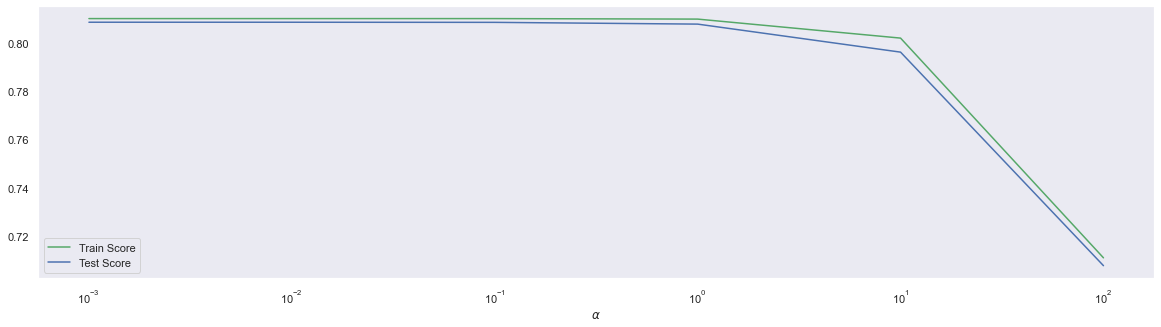

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.001, 0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()


From the graph, we can see that the best $\alpha$ parameters are 0.001, 0.1 or 0.01, because all are a tie and have almost same values for train and test scores, just by visualizing. But we need to analyse further

In [61]:
print(train_score_list)
print(test_score_list)

[0.8099355868114496, 0.8099355603790858, 0.8099329823609258, 0.8097243526295944, 0.8018754501140135, 0.7111222451297408]
[0.8084306761942854, 0.8084263186121936, 0.8083792318357566, 0.8076537438220259, 0.7960810713658868, 0.7078813870729488]


In [62]:
#We have randomly selected alpha=0.01
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8099
Test score: 0.8084


In [63]:
ridge.coef_

array([ -0.18027084,  -1.5698378 , -14.80891553,  -1.31834703,
         0.17838556,   1.18434533,  -1.80666427,  -9.12486601,
         4.07946276,   3.56107452,   2.12756951,   4.56606583,
       -22.8278648 ,   4.01537331,   2.42576022,  -1.95062088,
         6.51111249,  12.18430311])

In [64]:
ridge.intercept_

55.68402334770613

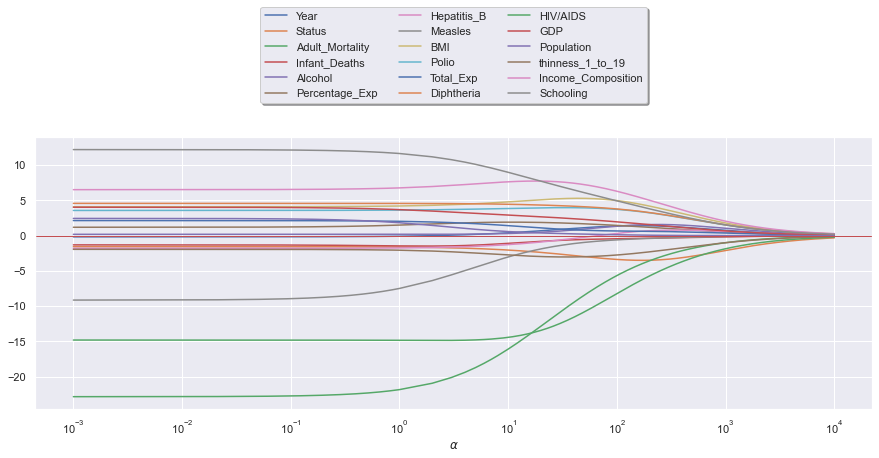

In [65]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,18):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='r')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Using Grid Search to find the best hyperparameters for the Ridge model

In [66]:
#We are only considering 1 hyperparameter here - alpha value
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_ridge))

from sklearn.model_selection import GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, return_train_score=True, cv=5)
grid_search_ridge.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_ridge.best_params_))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'alpha': 0.1}


Our GridSearchCV has chosen the best model with hyperparam alpha = 0.1

In [68]:
ridge_best = Ridge(random_state= 0, alpha= 0.1, normalize=True)
ridge_best.fit(X_train, y_train)
yridge_predicted = ridge_best.predict(X_test)

print('Train score: {:.4f}'.format(ridge_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ridge_best.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,yridge_predicted)))
MSE = np.square(np.subtract(y_test,yridge_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.8087
Test score: 0.8044
R2_score: 0.8044
MSE: 17.4551


# Checking Cross Validation scores

In [69]:
train_cvscore_ridge = cross_val_score(grid_search_ridge, X_train, y_train, cv=5)
print(train_cvscore_ridge)

#Average Cross Validation Score for Train Set
print("The average cross validated train score is: {:.4f}".format(train_cvscore_ridge.mean()))

[0.81825006 0.83711113 0.77291667 0.79195051 0.81512842]
The average cross validated train score is: 0.8071


# 4. LASSO REGRESSION

In [70]:
from sklearn.linear_model import Lasso
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [71]:
print(train_score_list)
print(test_score_list)

[0.8099127871289875, 0.809139555061883, 0.7891004264303272, 0.2633370243534864, 0.0, 0.0]
[0.8083884074299643, 0.8085544947530974, 0.7865124330569317, 0.28183198518727515, -0.0012445268726419823, -0.0012445268726419823]


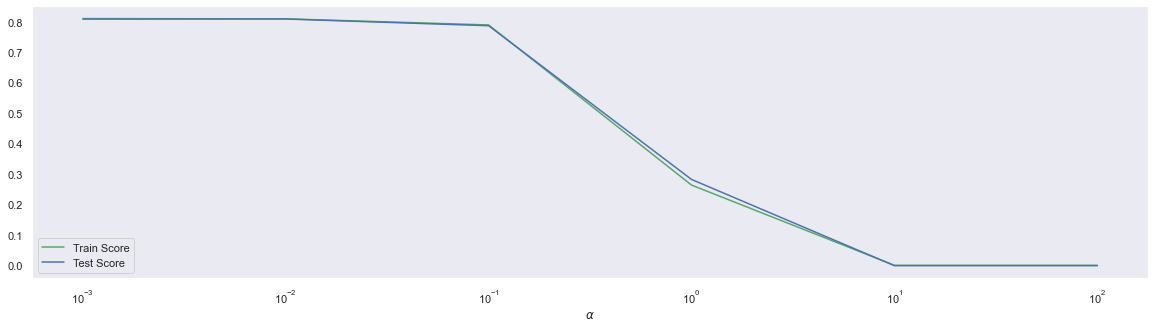

In [72]:
#Visualizing the best hyperparamter value for alpha

%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

From the graph, we can see that the best $\alpha$ parameters are 0.001, 0.1 or 0.01, and have almost same values for train and test scores. We need to analyze further

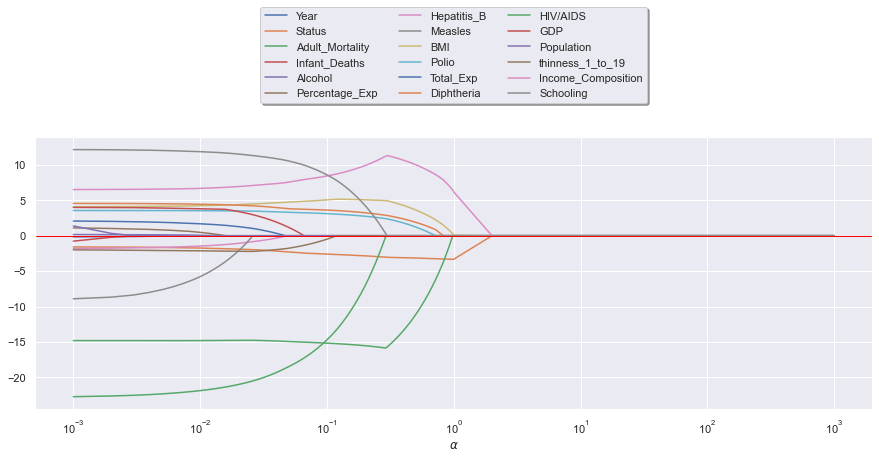

In [73]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,18):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='red')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [74]:
#Randomly selecting alpha hyperparameter value as 0.01
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.8091
Test score: 0.8086


# Using Grid Search to find the best hyperparameters for the Lasso model

In [75]:
#We are only considering 1 hyperparameter here - alpha value
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_lasso))

lasso=Lasso()
from sklearn.model_selection import GridSearchCV
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, return_train_score=True, cv=5)
grid_search_lasso.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_lasso.best_params_))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'alpha': 0.001}


Our Grid Search on Lasso hyperparams has suggested that the best alpha param value is 0.001. Let's fit the Lasso model using this value to see the performance

In [76]:
lasso_best = Lasso(random_state= 0, alpha= 0.001)
lasso_best.fit(X_train, y_train)
ylasso_predicted = lasso_best.predict(X_test)

print('Train score: {:.4f}'.format(lasso_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lasso_best.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,ylasso_predicted)))
MSE = np.square(np.subtract(y_test,ylasso_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.8099
Test score: 0.8084
R2_score: 0.8084
MSE: 17.0979


Not much difference in the scores with and without grid search.

# With our chosen model, let's find the coefficients

In [77]:
lasso_best = Lasso(alpha = 0.001)
lasso_best.fit(X_train, y_train)
dict(zip(X.columns, lasso_best.coef_))

{'Year': -0.15724890308683373,
 'Status': -1.5836639475267205,
 'Adult_Mortality': -14.814869742379917,
 'Infant_Deaths': -0.7657927316981797,
 'Alcohol': 0.16757969030639214,
 'Percentage_Exp': 1.1072248311255741,
 'Hepatitis_B': -1.7807860180208999,
 'Measles': -8.909585004221789,
 'BMI': 4.094078919414206,
 'Polio': 3.562047036275162,
 'Total_Exp': 2.0769933406631167,
 'Diphtheria': 4.563653558051443,
 'HIV/AIDS': -22.739521995271428,
 'GDP': 4.000712263031426,
 'Population': 1.3821118001631887,
 'thinness_1_to_19': -1.9891593717703837,
 'Income_Composition': 6.523167750702716,
 'Schooling': 12.169563981999898}

The coefficients with high absolute value are tied to the most significant features. These coefficient values being higher will take longer to get to 0, which states their importance

(-25.0, 25.0)

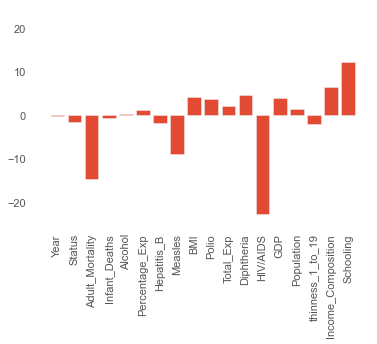

In [78]:
plt.style.use('ggplot')
plt.bar(range(18), lasso_best.coef_)
plt.box(False)
plt.xticks(range(18), X.columns, rotation = 90)
plt.grid()
plt.ylim(-25, 25)

Some of the most important features are- Adult Mortality, Measles, HIV/AIDS, Income Composition and Schooling

# Calculating the average training and test scores using cross validation on the Lasson model

In [79]:
train_cvscore_lasso = cross_val_score(grid_search_lasso, X_train, y_train, cv=5)
print(train_cvscore_lasso)

#Average Cross Validation Score for Train Set
print("The average cross validated train score is: {:.4f}".format(train_cvscore_lasso.mean()))

[0.81805881 0.8369318  0.77299624 0.79299123 0.81440376]
The average cross validated train score is: 0.8071


# 5. POLYNOMIAL REGRESSION

In [80]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list_poly = []
test_score_list_poly = []

for i in range(1,4):
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    train_score_list_poly.append(poly_reg.score(X_train_poly, y_train))
    test_score_list_poly.append(poly_reg.score(X_test_poly, y_test))

In [81]:
print(train_score_list_poly)
print(test_score_list_poly)

[0.8099355870791246, 0.9255874790932703, 0.9588314041270302]
[0.8084311562832188, 0.8931488221180514, -443.16117829079013]


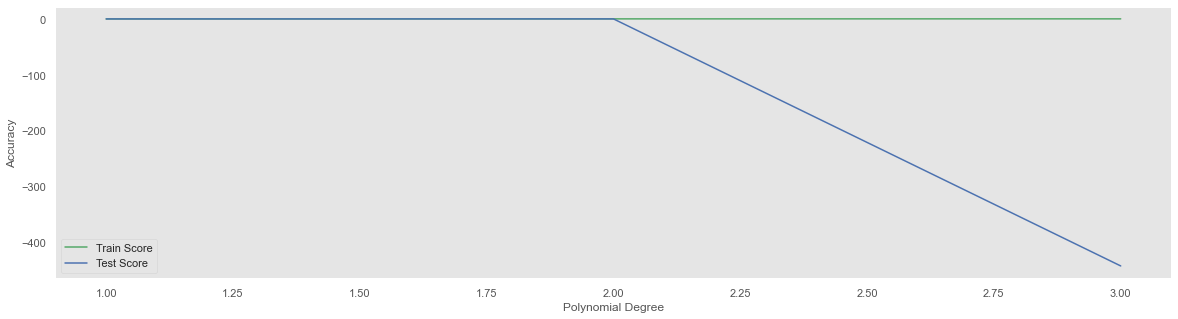

In [82]:
#Visualizing values of the hyperparamters i.e polynomial degree for Polynomial Features model to see which could be best
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(range(1,4), train_score_list_poly, c = 'g', label = 'Train Score')
plt.plot(range(1,4), test_score_list_poly, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.grid()

The train and test scores are high for polynomial of degrees 1 and 2. Test score starts deteriorating after 2

Let's plot Polynomail Feature(2) model on 2 features - y axis Life Expectancy and x-axis Schooling. We should see a curve as model

Text(0, 0.5, 'Life Expectancy')

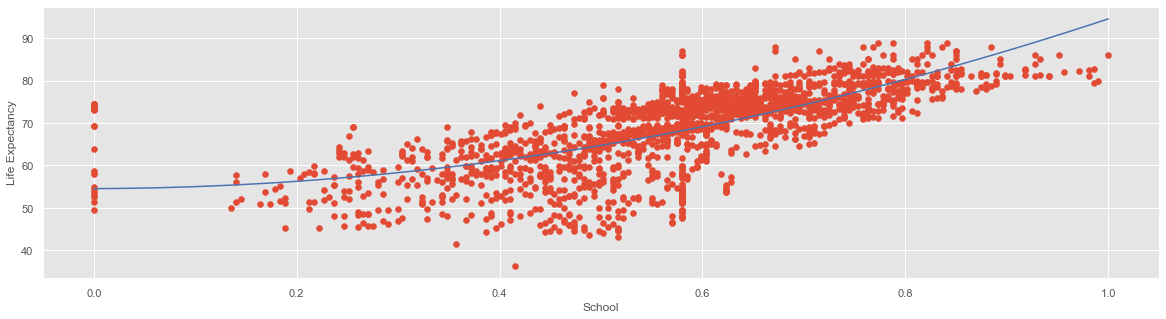

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_school = X_train[:,17].reshape(-1,1)
poly = PolynomialFeatures(2)
school_Xtrain_poly = poly.fit_transform(X_train_school)
lreg.fit(school_Xtrain_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict_lifexp = lreg.predict(x_poly)


plt.subplots(figsize = (20,5))
plt.plot(x_axis, y_predict_lifexp, c = 'b')
plt.scatter(X_train_school,y_train)
plt.xlabel('School')
plt.ylabel('Life Expectancy')

In [84]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg.fit(X_train_poly, y_train)

y_poly_predicted = poly_reg.predict(X_test_poly)

print('Train score: {:.4f}'.format(poly_reg.score(X_train_poly, y_train)))
print('Test score: {:.4f}'.format(poly_reg.score(X_test_poly, y_test)))

print('R2_score: {:.4f}'.format(r2_score(y_test,y_poly_predicted)))
MSE = np.square(np.subtract(y_test,y_poly_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.9256
Test score: 0.8931
R2_score: 0.8931
MSE: 9.5346


# Using grid search to find the best hyperparameters for polynomial regression

In [85]:
#We have used Naive Grid Search to find the best hyperparams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score 
degrees = [2, 3, 4] # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here
best_score = 0
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(X_train)
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(X_train_poly, y_train)
        scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=5) # Change k-fold cv value here
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degree
            best_normalize = normalize

(best_degree)

2

In [86]:
best_score

0.902508506888152

In [87]:
best_normalize

True

In [88]:
best_poly_reg = PolynomialFeatures(degree=2)
X_train_poly = best_poly_reg.fit_transform(X_train)
X_test_poly = best_poly_reg.transform(X_test)
lreg_poly=LinearRegression(copy_X= True, fit_intercept=True, normalize=False)
lreg_poly.fit(X_train_poly, y_train)

y_pred_poly=lreg_poly.predict(X_test_poly)

print('Train score: {:.4f}'.format(lreg_poly.score(X_train_poly, y_train)))
print('Test score: {:.4f}'.format(lreg_poly.score(X_test_poly, y_test)))


print('R2_score: {:.4f}'.format(r2_score(y_test,y_pred_poly)))
MSE = np.square(np.subtract(y_test,y_pred_poly)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.9256
Test score: 0.8931
R2_score: 0.8931
MSE: 9.5346


In [89]:
train_cvscore_poly = cross_val_score(polynomial_regressor, X_train, y_train, cv=7)
print(train_cvscore_poly)

#Average Cross Validation Score for Train Set
print("The average cross validated train score is: {:.4f}".format(train_cvscore_poly.mean()))

[0.81088516 0.82273894 0.84158123 0.75682662 0.78548072 0.81016916
 0.81936168]
The average cross validated train score is: 0.8067


In [90]:
test_cvscore_poly = cross_val_score(polynomial_regressor, X_test, y_test, cv=7)
print(test_cvscore_poly)

#Average Cross Validation Score for Test Set
print("The average cross validated test score is: {:.4f}".format(test_cvscore_poly.mean()))

[0.7914995  0.83559602 0.80047452 0.83238149 0.83215056 0.80528499
 0.76540331]
The average cross validated test score is: 0.8090


# 6. DECISION TREE REGRESSION

In [91]:
np.where(X.columns == 'Schooling')

(array([17], dtype=int64),)

Text(0.5, 0, 'Schooling')

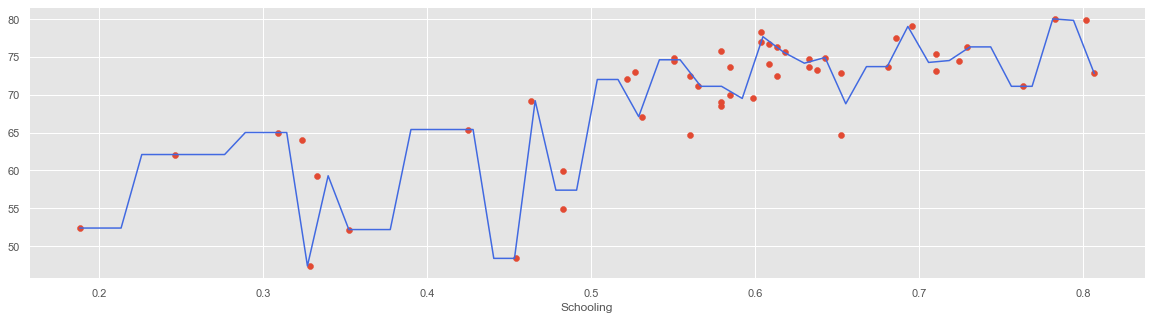

In [92]:
#Visualizing the Decision Tree Regressor on random hyperparameter values
from sklearn.tree import DecisionTreeRegressor

X_b = X_train[:50,17].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeRegressor()
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.xlabel('Schooling')

In [93]:
from sklearn.tree import DecisionTreeRegressor

dt_train_score=[]
dt_test_score=[]

for i in range(1,15):
    dtregressor = DecisionTreeRegressor(max_depth=i,random_state= 0)
    dtregressor.fit(X_train, y_train)
    dt_train_score.append(dtregressor.score(X_train, y_train))
    dt_test_score.append(dtregressor.score(X_test, y_test))

In [94]:
print(dt_train_score)
print(dt_test_score)

[0.583452324620851, 0.7308774139710439, 0.837153550445705, 0.8835887954561785, 0.9186698182038268, 0.9413696989013101, 0.9580735927719675, 0.9705578544165318, 0.9796577516030942, 0.9862174746116673, 0.9909011751539853, 0.9938898490164285, 0.9963928812052157, 0.9978927503386358]
[0.5611527617086443, 0.7117250097064891, 0.8203957797647027, 0.8451575559932506, 0.8759144746020041, 0.9003461647598858, 0.9094419169405499, 0.9031425418091344, 0.9049486417397059, 0.9058793324226568, 0.9067544574363079, 0.9072752701758576, 0.9119856478797868, 0.9077858034727039]


Text(0, 0.5, 'Accuracy')

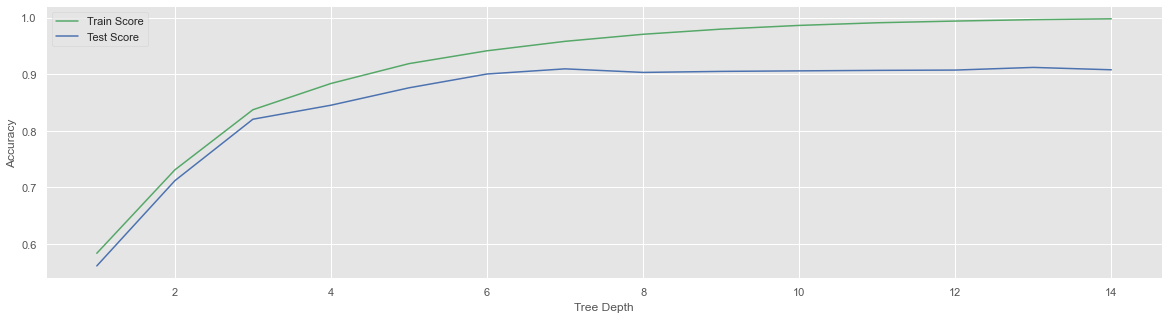

In [95]:
x_axis = range(1,15)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, dt_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, dt_test_score, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')

Just visualizing, the best hyperparameter depth seems to be 6 because it has high train and test scores and a small gap between train and test scores

In [96]:
tregressor = DecisionTreeRegressor(max_depth=6)
dtregressor.fit(X_train, y_train)
ydt_predicted = dtregressor.predict(X_test)

print('Train score: {:.4f}'.format(dtregressor.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dtregressor.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,ydt_predicted)))
MSE = np.square(np.subtract(y_test,ydt_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.9979
Test score: 0.9078
R2_score: 0.9078
MSE: 8.2285


# Use GridSearch to find the best hyperparameters for Decision Tree Regressor

In [97]:
#We have considered a few of the hyperparameters here to find which could be the best
dt_param_grid = {'max_depth' : range(1,10),'min_samples_leaf' : range(1,10), 'criterion':['gini','mse', 'mae'], 'splitter': ['best', 'random']}

dtregressor = DecisionTreeRegressor(random_state=0)
dt_best_reg = GridSearchCV(estimator = dtregressor, param_grid = dt_param_grid , return_train_score=True)
dt_best_reg.fit(X_train, y_train)

dt_best_params = dt_best_reg.best_params_
print(dt_best_params)

{'criterion': 'mae', 'max_depth': 9, 'min_samples_leaf': 3, 'splitter': 'best'}


In [98]:
best_dt_reg = DecisionTreeRegressor(criterion='mae', max_depth= 9, min_samples_leaf= 3, splitter= 'best')
best_dt_reg.fit(X_train, y_train)
ydt_predicted = best_dt_reg.predict(X_test)

print('Train score: {:.4f}'.format(best_dt_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_dt_reg.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,ydt_predicted)))
MSE = np.square(np.subtract(y_test,ydt_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.9697
Test score: 0.9137
R2_score: 0.9137
MSE: 7.6977


The chosen paramters for the decision tree has a very good train and test score and also has a relatively low MSE. Decision Trees are prone to overfitting. But as the depth increases, the model will traverse entirely and the train and test scores will obviously get better because the model is now overfit. We need an early stopping condition i.e we need to reduce the depth.

In [99]:
train_cvscore_dtreg = cross_val_score(best_dt_reg, X_train, y_train, cv=7)
print(train_cvscore_dtreg)

#Average Cross Validation Score for Train Set
print("The average cross validated train score is: {:.4f}".format(train_cvscore_dtreg.mean()))

[0.9229699  0.92609277 0.92311969 0.91658906 0.90549965 0.9285302
 0.92531476]
The average cross validated train score is: 0.9212


In [100]:
test_cvscore_dtreg = cross_val_score(best_dt_reg, X_test, y_test, cv=7)
print(test_cvscore_dtreg)

#Average Cross Validation Score for Train Set
print("The average cross validated train score is: {:.4f}".format(test_cvscore_dtreg.mean()))

[0.8544246  0.90156158 0.8806744  0.90362407 0.84117987 0.89045062
 0.81477677]
The average cross validated train score is: 0.8695


In [101]:
#Randomly changing the depth to a lower value
reduced_dt_reg = DecisionTreeRegressor(criterion='mae', max_depth=4, min_samples_leaf= 3, splitter= 'best')
reduced_dt_reg.fit(X_train, y_train)
yred_predicted = reduced_dt_reg.predict(X_test)

print('Train score: {:.4f}'.format(reduced_dt_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(reduced_dt_reg.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,yred_predicted)))
MSE = np.square(np.subtract(y_test,yred_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.8794
Test score: 0.8411
R2_score: 0.8411
MSE: 14.1774


We can see how the scores reduce and the MSE increases if we make the max_depth smaller. Hence, if we find a better model, we will not consider the decision tree to be the best model

# 7. LINEAR SVM

Text(0, 0.5, 'Accuracy')

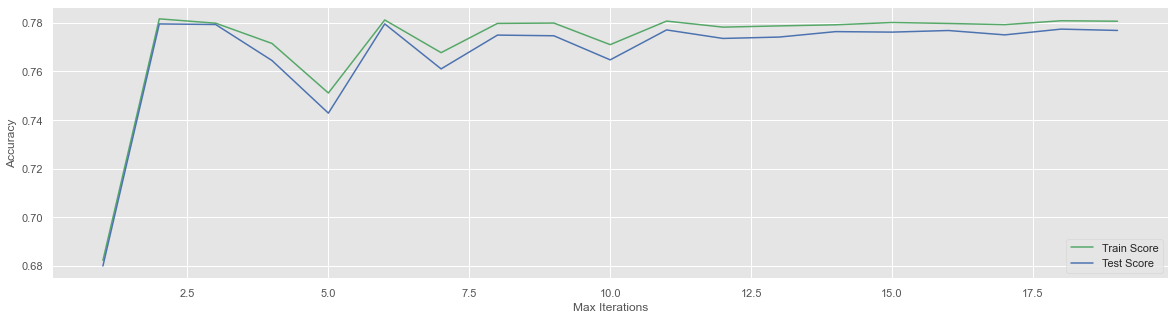

In [102]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVR
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_decision_regions, category_scatter

svr_train_score_list = []
svr_test_score_list = []

for n in range(1,20):
    linear_svr = LinearSVR(max_iter=n,random_state= 0)
    linear_svr.fit(X_train, y_train)
    svr_train_score_list.append(linear_svr.score(X_train, y_train))
    svr_test_score_list.append(linear_svr.score(X_test, y_test))
    
x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, svr_train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, svr_test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')

In [103]:
print(svr_train_score_list)

[0.6821981093729756, 0.7815797119856455, 0.7797981196854222, 0.7714586920646729, 0.7510831335443346, 0.7811228156737751, 0.7676774202243739, 0.7797023024315968, 0.7798522455984395, 0.7709705411743748, 0.7806633955688503, 0.7781765325170666, 0.7786840206985826, 0.779131765349332, 0.7800789103410043, 0.7796824496758451, 0.7791997012939909, 0.7807986399361599, 0.7806061723085798]


In [104]:
print(svr_test_score_list)

[0.6799211085045018, 0.7794877278804673, 0.779250437997991, 0.7644347311048585, 0.7427918787063298, 0.7795102083713116, 0.7609947312362892, 0.7748980234584069, 0.7746209613796565, 0.764713770432091, 0.7770257033684325, 0.7735228722000959, 0.7740912193940082, 0.776326614498106, 0.7761253872210514, 0.7767834613281166, 0.774990577468399, 0.7773590419567166, 0.7768109183581035]


From the graph it seems that the best number of iterations is either 2, 3, 6 or some iterations from 11-20. Their values are pretty similar if we just have a glance at the visualization

In [105]:
#Randomly taking max_iter as 3
linear_svr = LinearSVR(3)
linear_svr.fit(X_train, y_train)

print("Train score: {:.4f}".format(linear_svr.score(X_train, y_train)))
print("Test score: {:.4f}".format(linear_svr.score(X_test, y_test)))

Train score: 0.7867
Test score: 0.7836


# Using Grid Search on Linear SVR to get the best hyperparameters

In [106]:
#To find the hyperparameter list of a model
linear_svr = LinearSVR()
linsvr_params = linear_svr.get_params()
print(f'Default Linear Reg hyperparameters: {linsvr_params}')

Default Linear Reg hyperparameters: {'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 1.0, 'loss': 'epsilon_insensitive', 'max_iter': 1000, 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [107]:
#We have considered a few of the hyperparameters here to find which could be the best
linsvr_param_grid = {'max_iter' : range(1,100), 'C':[0.001, 0.01, 0.1, 1, 10, 100]}

linear_svr = LinearSVR(random_state=0)
linsvr_best_reg = GridSearchCV(estimator =linear_svr , param_grid =linsvr_param_grid , return_train_score=True, cv=5)
linsvr_best_reg.fit(X_train, y_train)

linsvr_best_params = linsvr_best_reg.best_params_
print(linsvr_best_params)

{'C': 10, 'max_iter': 55}


In [108]:
best_linsvr = LinearSVR(C=10, max_iter=55)
best_linsvr.fit(X_train, y_train)
ylinsvr_predicted = best_linsvr.predict(X_test)

print('Train score: {:.4f}'.format(best_linsvr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_linsvr.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,ylinsvr_predicted)))
MSE = np.square(np.subtract(y_test,ylinsvr_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.7989
Test score: 0.7966
R2_score: 0.7966
MSE: 18.1495


In [109]:
train_linsvr_score = cross_val_score(best_linsvr, X_train, y_train, cv=5)
print(train_linsvr_score)

#Average Cross Validation Score for Train Set
print("The average cross validated train score is: {:.4f}".format(train_linsvr_score.mean()))

[0.80526469 0.82934243 0.76669303 0.74086776 0.795951  ]
The average cross validated train score is: 0.7876


In [110]:
test_linsvr_score = cross_val_score(best_linsvr, X_test, y_test, cv=5)
print(test_linsvr_score)

#Average Cross Validation Score for Train Set
print("The average cross validated test score is: {:.4f}".format(test_linsvr_score.mean()))

[0.77512464 0.78972195 0.81369726 0.81472823 0.75914718]
The average cross validated test score is: 0.7905


# KERNEL SVR

In [115]:
from sklearn.svm import SVR

for i in ['linear','poly','rbf']:
    ker = SVR(kernel = i, gamma = 'auto')
    ker.fit(X_train, y_train)
    ker_train= ker.score(X_train,y_train)
    ker_test = ker.score(X_test, y_test)
    print('For the', i,'kernel, the train score is: {:.4f}'.format(ker_train))
    print('For the', i,'kernel, the test score is: {:.4f}'.format(ker_test))
    print('\n')

For the linear kernel, the train score is: 0.7943
For the linear kernel, the test score is: 0.7920


For the poly kernel, the train score is: 0.3195
For the poly kernel, the test score is: 0.3321


For the rbf kernel, the train score is: 0.7536
For the rbf kernel, the test score is: 0.7522




# Kernel SVR (Linear)

In [116]:
#We are considering only the two main parameters- C and gamma
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_ker_lin = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv = 5, return_train_score=True)
grid_ker_lin.fit(X_train,y_train)

print("Best parameters for kernel SVR linear: {}".format(grid_ker_lin.best_params_))
print("Best cross-validationscore: {:.2f}".format(grid_ker_lin.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters for kernel SVR linear: {'C': 100, 'gamma': 0.001}
Best cross-validationscore: 0.80


In [117]:
best_kerlinsvr = SVR( kernel = 'linear', C=100, gamma=0.001)
best_kerlinsvr.fit(X_train, y_train)
ykerlinsvr_predicted = best_kerlinsvr.predict(X_test)

print('Train score: {:.4f}'.format(best_kerlinsvr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_kerlinsvr.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,ykerlinsvr_predicted)))
MSE = np.square(np.subtract(y_test,ykerlinsvr_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.8006
Test score: 0.7989
R2_score: 0.7989
MSE: 17.9448


# Kernel SVR (poly)

In [ ]:
""#We are considering only the two main parameters- C and gamma
"grid_ker_poly = GridSearchCV(SVR(kernel = 'poly'), param_grid, cv = 5, return_train_score=True)
"grid_ker_poly.fit(X_train,y_train)

"print("Best parameters for kernel SVR poly: {}".format(grid_ker_poly.best_params_))
"print("Best cross-validationscore: {:.2f}".format(grid_ker_poly.best_score_))
"print('Train score: {:.4f}'.format(grid_ker_poly.score(X_train, y_train)))
"print('Test score: {:.4f}'.format(grid_ker_poly.score(X_test, y_test)))""

Poly kernel ran for 6 hours and has not converged. It is computationally not possible to run this model. Tried from Google colab as well

# Kernel SVR(rbf)

In [118]:
#We are considering only the two main parameters- C and gamma
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ker_rbf = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv = 7, return_train_score=True)
grid_ker_rbf.fit(X_train,y_train)

print("Best parameters for kernel rbf poly: {}".format(grid_ker_rbf.best_params_))
print("Best cross-validationscore: {:.2f}".format(grid_ker_rbf.best_score_))
print('Train score: {:.4f}'.format(grid_ker_rbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_ker_rbf.score(X_test, y_test)))

Best parameters for kernel rbf poly: {'C': 100, 'gamma': 1}
Best cross-validationscore: 0.93
Train score: 0.9636
Test score: 0.9205


In [119]:
best_kerrbfsvr = SVR( kernel = 'rbf', C=100, gamma=1)
best_kerrbfsvr.fit(X_train, y_train)
ykerrbfsvr_predicted = best_kerrbfsvr.predict(X_test)

print('R2_score: {:.4f}'.format(r2_score(y_test,ykerrbfsvr_predicted)))
MSE = np.square(np.subtract(y_test,ykerrbfsvr_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

R2_score: 0.9205
MSE: 7.0915


In [120]:
#Using grid search to get the best parameters and scores
best_score = 0
for gamma in [0.01, 0.1, 1, 10, 100]:
    for C in [0.01, 0.1, 1, 10, 100]:
        for kernel in ['linear','rbf']:
            ker_svr = SVR(kernel = kernel, gamma = gamma, C = C)
            ker_svr.fit(X_train, y_train)
            #cross-validation
            scores = cross_val_score(ker_svr, X_train, y_train, cv=5)
            #compute mean cross-validation accuracy
            score = np.mean(scores)
            
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma,'kernel':kernel}

In [121]:
best_score

0.9225533785781197

In [122]:
best_parameters

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

# ANALYZING BEST REGRESSION MODEL

# Best MSE

In [123]:
print('MSE KNN Regressor: {:.4f}'.format(mean_squared_error(y_test,y_predicted)))

MSE KNN Regressor: 6.1002


In [125]:
print('MSE KNN Regression: {:.4f}'.format(mean_squared_error(y_test,y_predicted)))
print('MSE Linear Regression: {:.4f}'.format(mean_squared_error(y_test,ylin_predicted)))
print('MSE Ridge Regression: {:.4f}'.format(mean_squared_error(y_test,yridge_predicted)))
print('MSE Lasso Regression: {:.4f}'.format(mean_squared_error(y_test,ylasso_predicted)))
print('MSE Polynomial Regression: {:.4f}'.format(mean_squared_error(y_test,y_pred_poly)))
print('MSE Decision Tree Rgression: {:.4f}'.format(mean_squared_error(y_test,ydt_predicted)))

#SVR
print('MSE Linear SVR: {:.4f}'.format(mean_squared_error(y_test,ylinsvr_predicted)))
print('MSE Kernel Linear SVR: {:.4f}'.format(mean_squared_error(y_test,ykerlinsvr_predicted)))
print('MSE Kernel rbf SVR: {:.4f}'.format(mean_squared_error(y_test,ykerrbfsvr_predicted)))

MSE KNN Regression: 6.1002
MSE Linear Regression: 17.0941
MSE Ridge Regression: 17.4551
MSE Lasso Regression: 17.0979
MSE Polynomial Regression: 9.5346
MSE Decision Tree Rgression: 7.6977
MSE Linear SVR: 18.1495
MSE Kernel Linear SVR: 17.9448
MSE Kernel rbf SVR: 7.0915


Smallest MSE is for KNN, Decision Tree Regression but we know that both these models overfit the data. And smallest MSE is also for Kernel rbf SVR

# Best R2 score

In [127]:
print('R2 Square score KNN Regression: {:.4f}'.format(r2_score(y_test,y_predicted)))
print('R2 Square score Linear Regression: {:.4f}'.format(r2_score(y_test,ylin_predicted)))
print('R2 Square score Ridge Regression: {:.4f}'.format(r2_score(y_test,yridge_predicted)))
print('R2 Square score Lasso Regression: {:.4f}'.format(r2_score(y_test,ylasso_predicted)))
print('R2 Square score Polynomial Regression: {:.4f}'.format(r2_score(y_test,y_pred_poly)))
print('R2 Square score Decision Tree Regression: {:.4f}'.format(r2_score(y_test,ydt_predicted)))

#SVR
print('R2 Square score Linear SVR: {:.4f}'.format(r2_score(y_test,ylinsvr_predicted)))
print('R2 Square score Kernel Linear SVR: {:.4f}'.format(r2_score(y_test,ykerlinsvr_predicted)))
print('R2 Square scoreE Kernel rbf SVR: {:.4f}'.format(r2_score(y_test,ykerrbfsvr_predicted)))

R2 Square score KNN Regression: 0.9316
R2 Square score Linear Regression: 0.8084
R2 Square score Ridge Regression: 0.8044
R2 Square score Lasso Regression: 0.8084
R2 Square score Polynomial Regression: 0.8931
R2 Square score Decision Tree Regression: 0.9137
R2 Square score Linear SVR: 0.7966
R2 Square score Kernel Linear SVR: 0.7989
R2 Square scoreE Kernel rbf SVR: 0.9205


Best R2 score values are for KNN, Polynomial Regression, Decision Tree and Kernel rbf. But we know that KNN and Decision Tree Regression overfit the data

# In our visualization we will only consider the models that have best MSE and R2 Score- KNN, Polynomial Regression, Decision Tree Regressor, and Kernel SVR rbf

In [128]:
R2score_KNN = r2_score(y_test,y_predicted)
R2score_Polynomial = r2_score(y_test,y_pred_poly)
R2score_Decisiontree = r2_score(y_test,ydt_predicted)
R2score_KernelRBF = r2_score(y_test,ykerrbfsvr_predicted)

MSE_KNN = mean_squared_error(y_test,y_predicted)
MSE_Polynomial = mean_squared_error(y_test,y_pred_poly)
MSE_Decisiontree = mean_squared_error(y_test,ydt_predicted)
MSE_KernelRBF = mean_squared_error(y_test,ykerrbfsvr_predicted)

<Figure size 1440x720 with 0 Axes>

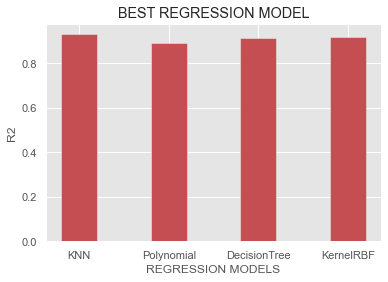

In [129]:
plt.figure(figsize=(20,10))

regs_i = 4
R2score_fin = [R2score_KNN, R2score_Polynomial, R2score_Decisiontree, R2score_KernelRBF]

fig, ax = plt.subplots()
index = np.arange(regs_i)
bar_width = 0.4

rects1 = plt.bar(index, R2score_fin, bar_width,
                    color='r',
                    label='R2 Score', align='center')

plt.xlabel('REGRESSION MODELS')
plt.ylabel('R2')
plt.title('BEST REGRESSION MODEL')
plt.xticks(index, ('KNN','Polynomial','DecisionTree','KernelRBF'))
plt.show()

# We need to see the model with the max R2 Score Kernel RBF and KNN

<Figure size 1440x720 with 0 Axes>

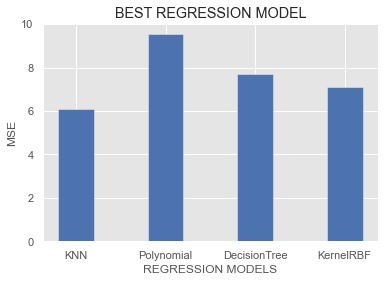

In [130]:
plt.figure(figsize=(20,10))
regs_i = 4

MSE_fin = [MSE_KNN ,MSE_Polynomial,  MSE_Decisiontree, MSE_KernelRBF]

fig, ax = plt.subplots()
index = np.arange(regs_i)
bar_width = 0.4

rects2 = plt.bar(index, MSE_fin, bar_width,
                    color='b',
                    label='MSE', align='center')

plt.xlabel('REGRESSION MODELS')
plt.ylabel('MSE')
plt.title('BEST REGRESSION MODEL')
plt.xticks(index, ('KNN','Polynomial','DecisionTree','KernelRBF'))
plt.show()

We need to see the model with the minimum MSE scores KNN and KernelRBF

So our final models to consider are KNN and KernelRBF SVM. However, we will not consider KNN as it overfits the data and there is data leakage

# OUR BEST REGRESSOR/MODEL IS KERNEL SVR RBF

We will train our model on the entire dataset using the best parameters and predict the target values for the test_set.

In [131]:
best_model_kersvr = SVR(C=100, gamma = 1, kernel ='rbf')
best_model_kersvr.fit(X_train, y_train)
y_bestmodelpred_kernelrbf = best_model_kersvr.predict(X_test)

print('Train score: {:.4f}'.format(best_model_kersvr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_model_kersvr.score(X_test, y_test)))
print('MSE: {:.4f}'.format(mean_squared_error(y_test, y_bestmodelpred_kernelrbf)))
print('R2 Score: {:.4f}'.format(r2_score(y_test, y_bestmodelpred_kernelrbf)))

Train score: 0.9636
Test score: 0.9205
MSE: 7.0915
R2 Score: 0.9205


# Our best model is Kernel RBF SVM with

# Train score: 0.9636

Test score : 0.9205

MSE: 7.0915

R2 Score 0.9205

In [132]:
scaler = MinMaxScaler()
X_train_main = scaler.fit_transform(X)
#We have scaled the entire dataset X (features only)

In [134]:
best_train_kersvr = SVR(C=100, gamma=1, kernel ='rbf')
best_train_kersvr.fit(X, y)
print('Train score: {:.4f}'.format(best_train_kersvr.score(X, y)))

Train score: 0.9999


# We have trained the Kernel RBF SVR on the entire dataset. It has very high train score of 0.9999